In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, cohen_kappa_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt

In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [3]:
df_dum = pd.get_dummies(df.drop(columns=['id']), columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 
                                     'work_type', 'Residence_type', 'smoking_status'])

X = df_dum.drop('stroke', axis=1)
y = df_dum.stroke.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=df_dum.stroke.values)

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train["bmi"] = imp.fit_transform(X_train[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Decision Tree 

clf = DecisionTreeClassifier(random_state=0, max_depth=18, min_samples_leaf=2, min_samples_split=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=8,
                       random_state=0)

In [6]:
X_test["bmi"] = imp.transform(X_test[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
y_pred = clf.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.17      0.12      0.14        50

    accuracy                           0.93      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.92      0.93      0.92      1022



In [9]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3889
           1       0.81      0.59      0.69       199

    accuracy                           0.97      4088
   macro avg       0.90      0.79      0.84      4088
weighted avg       0.97      0.97      0.97      4088



In [10]:
print('test set', accuracy_score(y_test, y_pred))
print('train set', accuracy_score(y_train, clf.predict(X_train)))

test set 0.9275929549902152
train set 0.9735812133072407


In [11]:
params = {'max_depth': [8, 10, 12, 14, 16, 18, 20], 
          'min_samples_split': [2, 6, 8, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 8]}


gs = GridSearchCV(clf, params, scoring='f1', cv=3,  n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1774s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1127s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1530s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=18, min_samples_leaf=2,
                                              min_samples_split=8,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 6, 8, 10, 12, 14]},
             scoring='f1', verbose=10)

In [12]:
gs.best_params_

{'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 8}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

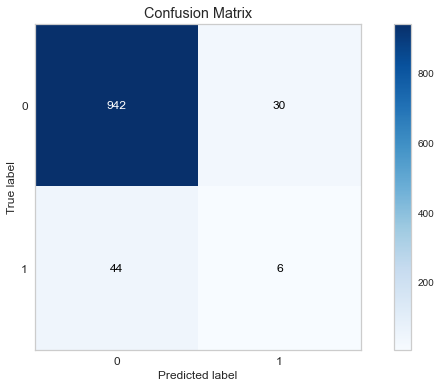

In [13]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12, 6))

<AxesSubplot:>

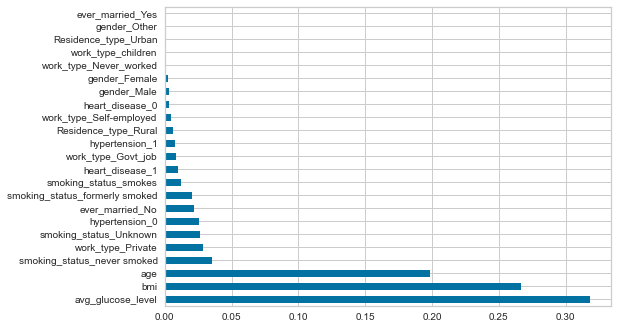

In [14]:
feat_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(len(feat_imp)).plot(kind='barh')

In [15]:
feat_imp.sort_values(ascending=False)

avg_glucose_level                 0.318090
bmi                               0.266478
age                               0.198771
smoking_status_never smoked       0.035443
work_type_Private                 0.028763
smoking_status_Unknown            0.026510
hypertension_0                    0.025554
ever_married_No                   0.021929
smoking_status_formerly smoked    0.020116
smoking_status_smokes             0.012142
heart_disease_1                   0.010200
work_type_Govt_job                0.008440
hypertension_1                    0.007408
Residence_type_Rural              0.006318
work_type_Self-employed           0.005013
heart_disease_0                   0.003192
gender_Male                       0.003169
gender_Female                     0.002465
work_type_Never_worked            0.000000
work_type_children                0.000000
Residence_type_Urban              0.000000
gender_Other                      0.000000
ever_married_Yes                  0.000000
dtype: floa

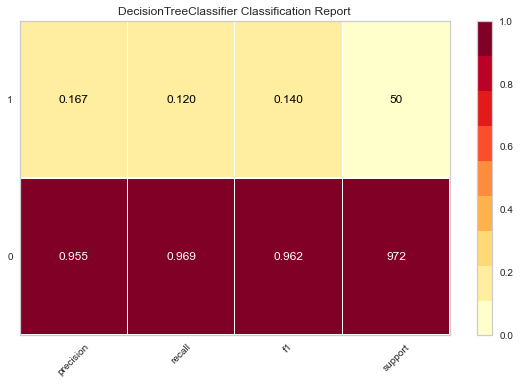

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [16]:
visualizer = ClassificationReport(clf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [17]:
print('train set', cohen_kappa_score(y_train, clf.predict(X_train)))
print('test set', cohen_kappa_score(y_test, y_pred))

train set 0.6726112703754072
test set 0.10278555497556119


In [18]:
print('train set', fbeta_score(y_train, clf.predict(X_train), beta=2.0))
print('test set', fbeta_score(y_test, y_pred, beta=2.0))

train set 0.6269925611052072
test set 0.1271186440677966


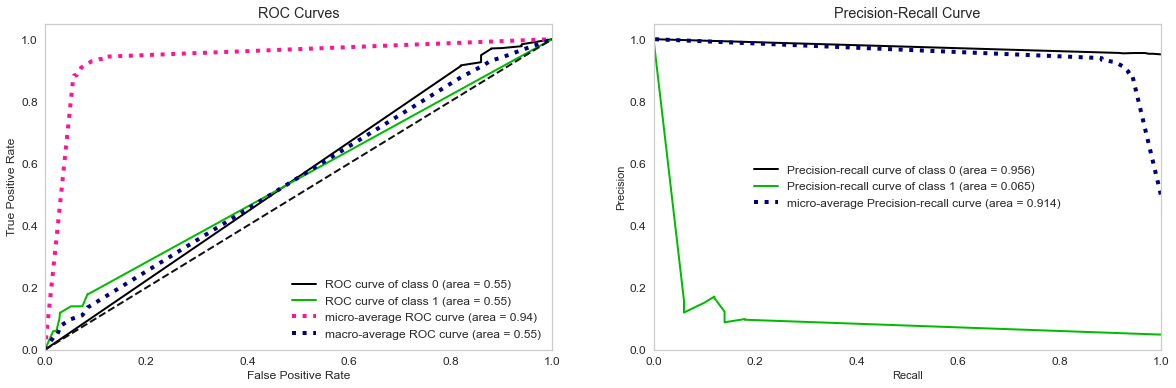

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 6), ax=ax1)
skplt.metrics.plot_precision_recall(y_test, clf.predict_proba(X_test), figsize=(10, 6), ax=ax2)
ax1.grid()
ax2.grid()